# Exploratory data analysis

http://patbaa.web.elte.hu/physdm/data/titanic.csv

On the link above you will find a dataset about the Titanic passengers. Your task is to explore the dataset.

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)



#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.



#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!



#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 



#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

# Task 1

In [1]:
#  improting the basic libraries for the task
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
url = "http://patbaa.web.elte.hu/physdm/data/titanic.csv"
Solution_DataFrame = pd.read_csv(url,delimiter=',')

In [3]:
def cloumn_check(df,divider = 2,replacer = -1):
    """
    This function fills a column if it has too many missing data
    Takes 3 argument, the data we want to check, an optional divider, and an optional replacer value
    For deciding how many is missing, the function divides the length of column with the divider
    If there are more missing values then this number, the function fills the column
    Replacer is optional, it's default value is -1
    """
    miss = df.isna().sum()
    number_of_missings = miss[df.columns]

    position = miss[ number_of_missings > len(df)/divider].index

    df[position] = df[position].fillna(value = replacer)
    return df

In [4]:

def mean_column_fill(df,percent = 0.1):
    """
    This function fills a column with the column mean if just a small percent of data is missing
    Takes two arguments, first one is the data we want to check
    If the missing data is over this percentage the function fills the column with the round mean of the column
    The percent is optional to chose, default is 0.1
    """
    miss = df.isna().sum()
    number_of_missings = miss[df.columns]
    position = miss[ number_of_missings > len(df)*percent].index

    df[position] = df[position].fillna(value = np.round(df[position].mean()))
    return df

In [5]:
def data_fixer(df, d = 2, r = -1, p = 0.1, drop_if_miss = 0):
    """
    This function calls just 3 others
    * mean_column_fill <- for it's percent parameter use the p
    * column check <- for it's divider use the d parameter and for replacer the r parameter
    * df.dropna <- this is a pandas function, it's only parameter can be given by drop_if_miss parameter
    """
    if not drop_if_miss:
        drop_if_miss = len(df.columns)-2
    df = df.dropna(thresh=drop_if_miss)
    df = cloumn_check(df,divider = d,replacer= r)
    df = mean_column_fill(df,percent=p)
    return df

In [8]:
missing_data = Solution_DataFrame.isna()

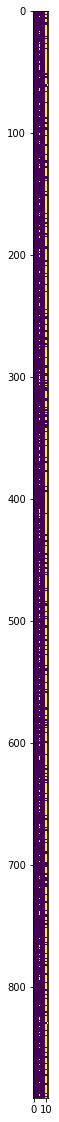

In [16]:
plt.figure(figsize=(20,20)) # It's hard to decide wich size fit's well
plt.imshow(missing_data)

In [17]:
Solution_DataFrame = data_fixer(Solution_DataFrame)

In [ ]:
# Solution_DataFrame

# Task 2

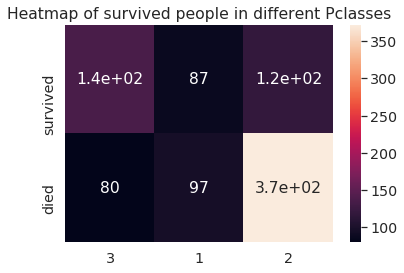

In [43]:
# Creating a seaborn heatmap, I guess not much explanation needed
Pclasses = Solution_DataFrame["Pclass"].unique()
survived = [ Solution_DataFrame[Solution_DataFrame['Pclass']==i+1]['Survived'].sum() for i in range(3)]
died = [len(Solution_DataFrame[Solution_DataFrame['Pclass']==i+1])-survived[i] for i in range(3)]
#

survived_and_died = [survived,died]
column =['survived','died']

sns.set(font_scale=1.3)
sad = pd.DataFrame(survived_and_died,index=column,columns = Pclasses)

plt.title("Heatmap of survived people in different Pclasses")
sns.heatmap(sad,annot = True)

# Task 3

In [52]:
ages = [Solution_DataFrame[Solution_DataFrame['Pclass'] == i]['Age'] for i in range(1,4)]

[Text(0.5, 1.0, 'Age distribution of different classes')]

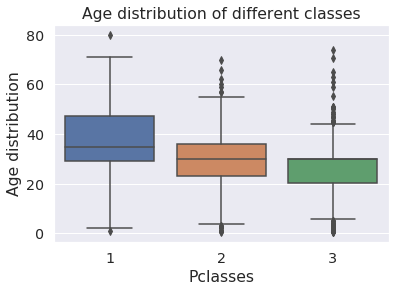

In [62]:
ax = sns.boxplot(data = ages)
ax.set(xticklabels=[1,2,3])
ax.set(xlabel = "Pclasses",ylabel = "Age distribution")
ax.set(title = "Age distribution of different classes")

# Task 4

In [68]:
pre_cor = Solution_DataFrame.select_dtypes(include=[np.number])

In [69]:
pre_cor = pre_cor.drop("PassengerId",axis = 1)
pre_cor = pre_cor.drop("Survived",axis = 1)

In [71]:
corr = pre_cor.corr()

Text(0.5, 1.0, 'Heatmap of numerical classes')

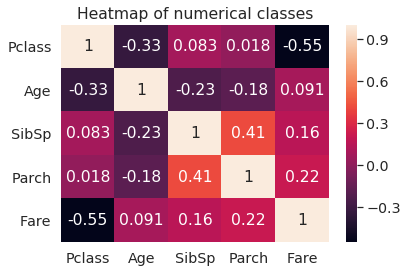

In [73]:
sns.heatmap(corr,annot = True)
plt.title("Heatmap of numerical classes")

# Task 5

In [129]:
def plot_by(first_column,second_column,df = Solution_DataFrame, sz = 4):
    """
    Thes function will make a double plot of any 2 chosen column of our Dataset
    The first two arguments is a string, wich columns we want to use for the plot
    If it is needed we are able to change the dataframe
    The first column goes as the pairplot hue parameter 

"""
    plotpair = df[[first_column,second_column]]
    
    sns.pairplot(plotpair,hue = first_column,height = sz)

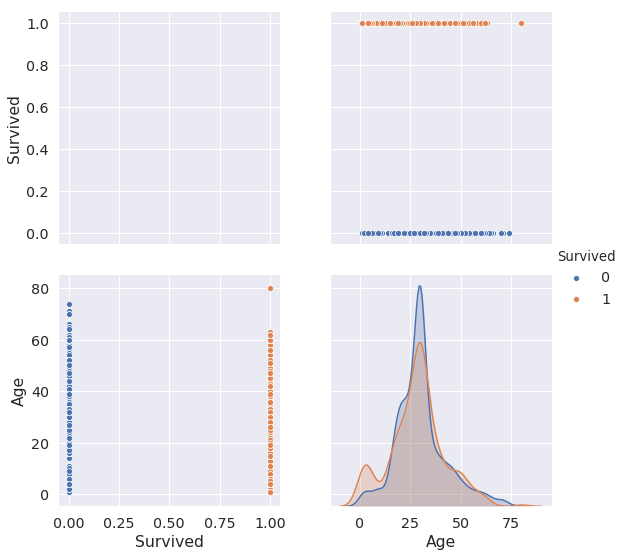

In [124]:
"""
These plots show that people about their 30 were most likely to survive the event
I chosed pairplot 'cause I find it's plot nice, informative and easy to use
Sometimes it gives more information, than it's needed, but beacues the task was not explicit I thought I give it a chance
"""
plot_by('Survived','Age')

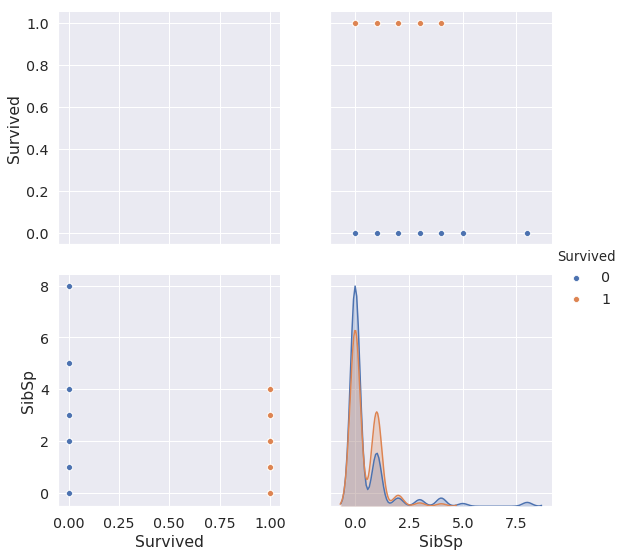

In [126]:
plot_by('Survived','SibSp')

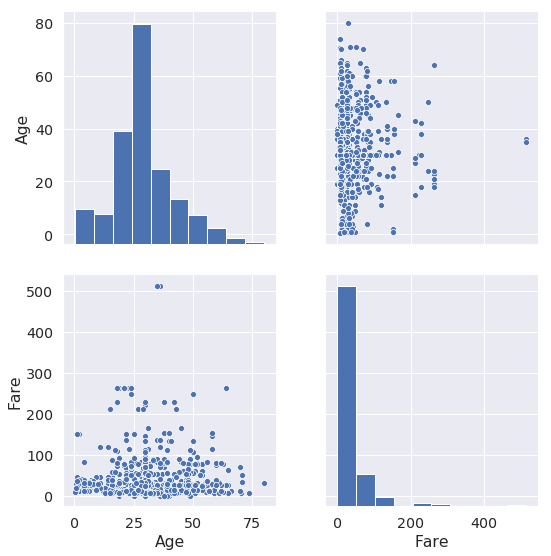

In [136]:
plotpair = Solution_DataFrame[['Age','Fare']]
sns.pairplot(plotpair,height = 4)